In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

In [2]:
#excel datasets

industry_df = pd.read_excel("Industry_Portfolios.xlsx")
market_df = pd.read_excel("Market_Portfolio.xlsx")
risk_df = pd.read_excel("Risk_Factors.xlsx")

industry_df = industry_df.drop(columns = "Date")

Part 1: Minimum-Tracking-Error Frontier\

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:
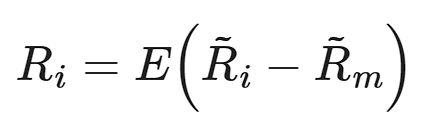


Also estimate the covariance matrix of return deviations, for the ten industry portfolios:
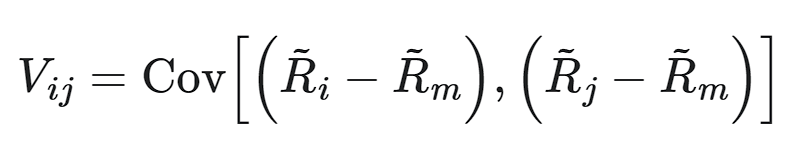

#### Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

In [3]:
name = []
returns = []
mean = []
std = []
excess_industry_df = industry_df.copy()

for col in excess_industry_df:
    excess_industry_df[col] = industry_df[col] - market_df["Market"]
    values = excess_industry_df[col]
    mean_return = statistics.mean(values)
    std_return = statistics.stdev(values)
    
    name.append(col)
    returns.append(values)
    mean.append(mean_return)
    std.append(std_return)

In [4]:
# Set Matrix
R = np.matrix(mean).getT()
V = np.cov(returns)
e = np.matrix("1; 1; 1; 1; 1; 1; 1; 1; 1; 1")

RT = R.transpose()
eT = e.transpose()
VI = np.linalg.inv(V)

# Set Variables
alpha = RT * VI * e
zeta = RT * VI * R
delta = eT * VI * e

#matrix to float
alpha = alpha[0,0]
zeta = zeta[0,0]
delta = delta[0,0]

Text(0.5, 1.0, 'minimum-tracking-error frontier')

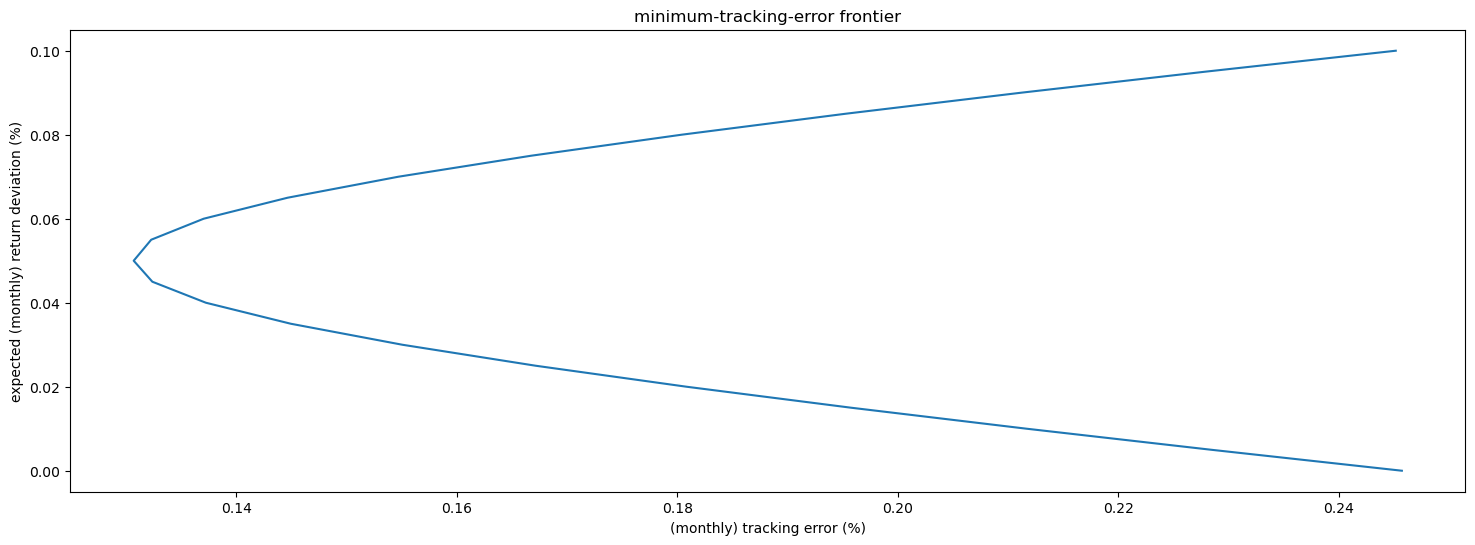

In [5]:
Rmv = alpha / delta

y = np.arange(0,0.1005,0.005)

x = (1/delta + (delta / (zeta * delta - alpha**2)) * ((y - Rmv)**2))**0.5

plt.figure(figsize = (18, 6))
plt.plot(x,y)
plt.ylabel("expected (monthly) return deviation (%)")
plt.xlabel("(monthly) tracking error (%)")
plt.title("minimum-tracking-error frontier")

#### Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

In [6]:
#tangent 
tangent = 0

xt = np.array([0,0.25])
yt = tangent + (((zeta - (2 * alpha * tangent) + (delta * (tangent**2))))**0.5) * xt

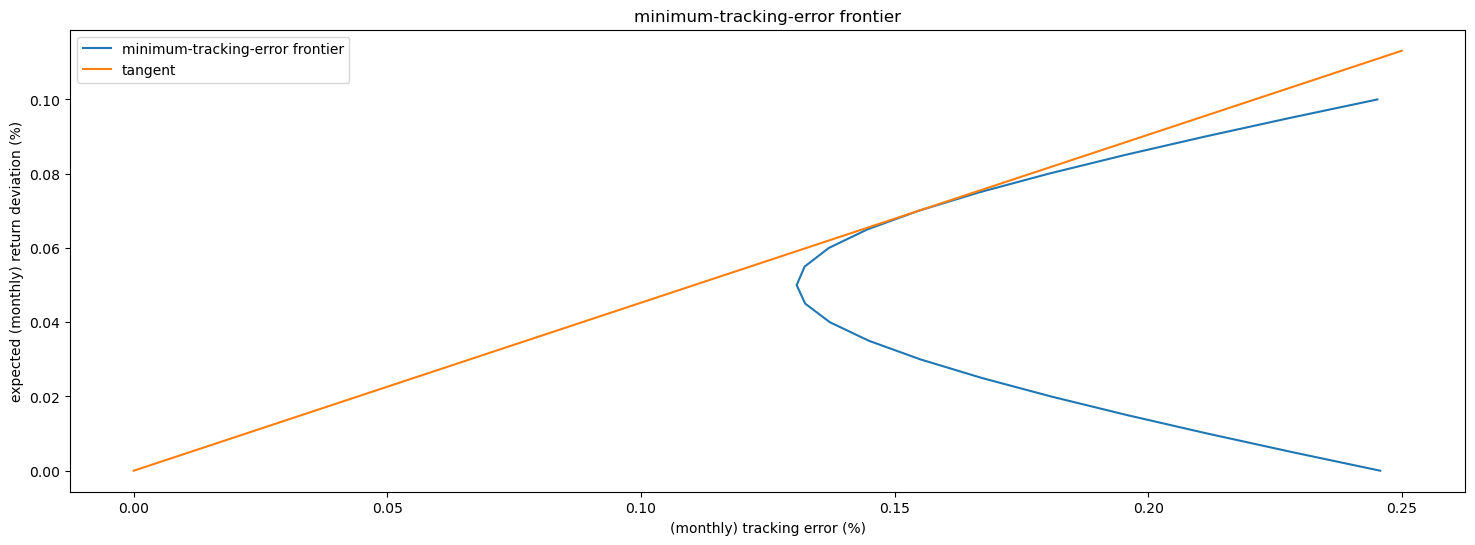

In [7]:
plt.figure(figsize = (18, 6))
plt.plot(x,y,label="minimum-tracking-error frontier")
plt.plot(xt,yt,label="tangent")
plt.ylabel("expected (monthly) return deviation (%)")
plt.xlabel("(monthly) tracking error (%)")
plt.title("minimum-tracking-error frontier")
plt.legend()

#### Calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [8]:
# Information Ratio
Information = (zeta - (2 * alpha * tangent) + (delta * (tangent**2)))**0.5

print("The Information ratio for the tangency portfolio is", Information)

The Information ratio for the tangency portfolio is 0.4524875396199313


In [9]:
# Mean Return
Rtg = (alpha * tangent - zeta) / (delta * tangent - alpha)
lamb = (Rtg - tangent)/(zeta - (2 * alpha * tangent) + (delta * tangent * tangent))
wstar = lamb * VI * (R - tangent * e)

table = zip(name, wstar)
col_names = ["Name","Tangency Portfolio Weights"]
print("The tangency portfolio weights for the ten industry portfolios is")
print(tabulate(table, headers = col_names))

The tangency portfolio weights for the ten industry portfolios is
Name      Tangency Portfolio Weights
------  ----------------------------
NoDur                    0.0526342
Durbl                    0.000153428
Manuf                    0.137627
Enrgy                    0.0870322
HiTec                    0.179353
Telcm                    0.071074
Shops                    0.106884
Hlth                     0.102776
Utils                    0.0401622
Other                    0.222304


Part 2: Minimum-Variance Frontier w/o Short Sales

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 100000 data points.

#### Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

Text(0.5, 1.0, 'minimum-variance frontier without short sales - normal')

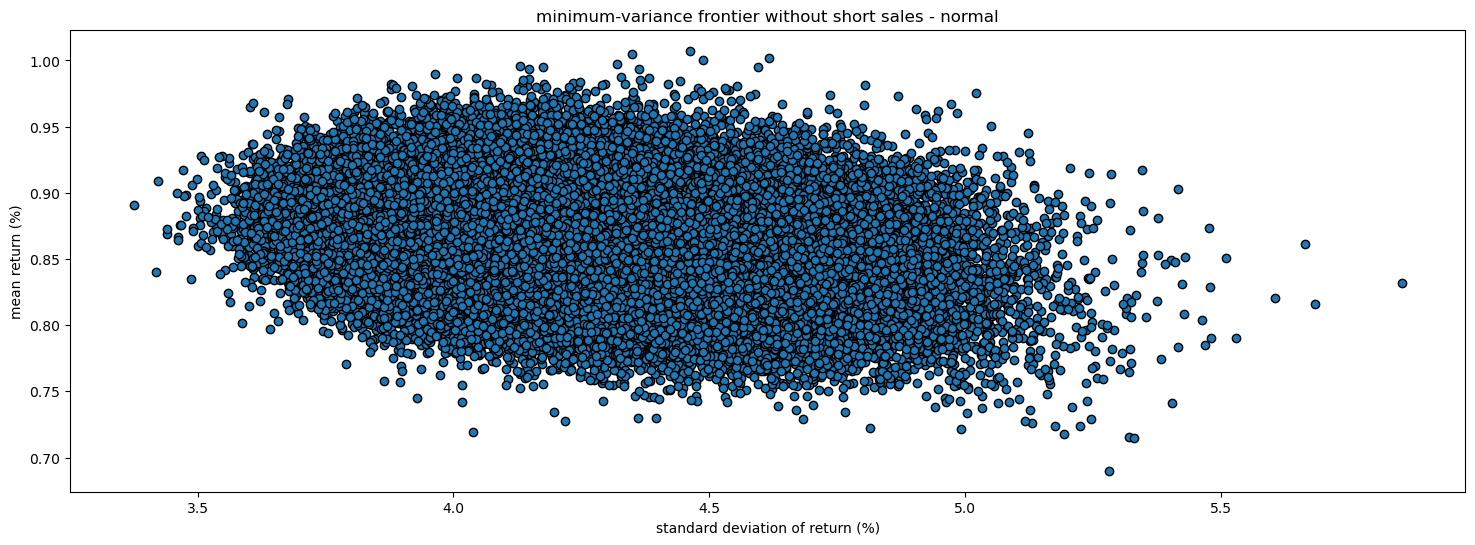

In [10]:
normal_return = []
normal_std = []

cov_matrix = np.cov(industry_df, rowvar=False)

for i in range(100000):
    weight = np.random.uniform(0,1,10)
    weight_normal = weight/sum(weight)
    
    return_normal = np.sum(weight_normal * np.mean(industry_df, axis=0))
    std_normal = np.sqrt(np.dot(weight_normal.T, np.dot(cov_matrix, weight_normal)))
    
    normal_return.append(return_normal)
    normal_std.append(std_normal)
    
plt.figure(figsize = (18, 6))
plt.scatter(normal_std,normal_return,edgecolors = 'black')
plt.xlabel("standard deviation of return (%)")
plt.ylabel("mean return (%)")
plt.title("minimum-variance frontier without short sales - normal")

Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

#### Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

Text(0.5, 1.0, 'minimum-variance frontier without short sales - normal')

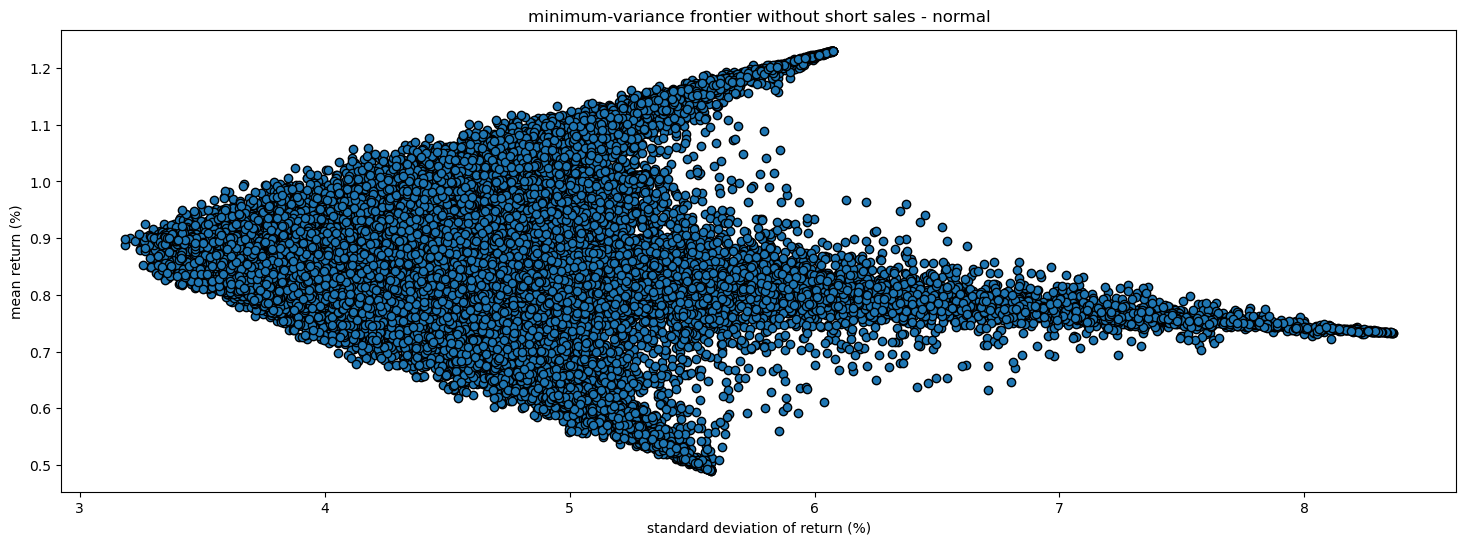

In [11]:
normal_return = []
normal_std = []

cov_matrix = np.cov(industry_df, rowvar=False)

for i in range(100000):
    weight = np.random.uniform(0,1,10)
    weight = 1/weight
    weight_normal = weight/sum(weight)
    
    return_normal = np.sum(weight_normal * np.mean(industry_df, axis=0))
    std_normal = np.sqrt(np.dot(weight_normal.T, np.dot(cov_matrix, weight_normal)))
    
    normal_return.append(return_normal)
    normal_std.append(std_normal)
    
plt.figure(figsize = (18, 6))
plt.scatter(normal_std,normal_return,edgecolors = 'black')
plt.xlabel("standard deviation of return (%)")
plt.ylabel("mean return (%)")
plt.title("minimum-variance frontier without short sales - normal")

Please submit all relevant results as an Adobe PDF file to Homework 4 before the end of Sunday, 8 Oct 2023.